<a href="https://colab.research.google.com/github/R267/Marchenko-lab5/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

house_prices_advanced_regression_techniques_path = kagglehub.competition_download('house-prices-advanced-regression-techniques')

print('Data source import complete.')


100%|██████████| 199k/199k [00:00<00:00, 48.0MB/s]

Extracting files...
Data source import complete.


# House Prices: Analysis, Data Visualization and Regression

In this work I will show you a deep analysis and data visualization of the dataset "House Prices" provided for kaggle in: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

# 1. Introduction

The idea of this dataset is to provide us a serie of features wich have as a target value the cost of a house.

# 2. Let's Start

First of all we need to load some libaries which are going to help us to analyze and visualize the data.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR



%matplotlib inline

After load libraries, we need to read and display the data frame.

In [7]:
prices = pd.read_csv('/content/sample_data/california_housing_train.csv')
prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


As we can see, there are different kind of values. For example: <b><i>MSSubClass</i></b> is a <i>int</i> value, <b><i>MSZoning</i></b> is a <i>object</i> value and <b><i>LotFrontage</i></b> is a <i>float</i> value. For differnt
reasons we must not to work with data in this format, we need to handle it to an apropiate format in order to apply
differnt algorithms of machine learning which work with discrete values not continuos. Now let's show information about the data frame.

In [8]:
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None


In [9]:
prices.select_dtypes(include=['object']).head()

""
0
1
2
3
4


As we can see, the are 43 columns or features which are category type.

# 3. Analyzing Data

Now that we know that at least the middle of the features are category type, we need to analyze if those
data have null values and solve it. So first we need to extract just the features
of <i>object</i> type making a copy from the original.

In [10]:
# prices = all features except those with object type value
# prices_objects = all features with object type value
prices_objects = prices.select_dtypes(include=['object']).copy()
prices = prices.select_dtypes(exclude=['object']).copy()
prices_objects.head()

""
0
1
2
3
4


In [11]:
prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Now, let's see how many values are <i>NAN</i> in <b><i>prices</i></b> and <b><i>prices_object</i></b>

In [12]:
prices = prices.drop(['longitude'],axis=1)
prices.isnull().sum()

,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


We can see that featues as <b><i>LotFrontag</i></b> and <b><i>GarageYrBlt</i></b> have some null values, in the next section we will solve this problem. Meanwhile, let's see what is happening with the <b><i>prices_object</i></b> dataset.

In [13]:
prices_objects.isnull().sum()

,0


We have seen that the features: <b><i>Alley</i>, <b><i>MasVnrType</i></b>, <i>BsmtQual</i>, <i>BsmtCond</i>, <i>BsmtExposure</i>, <i>BsmtFinType1</i>, <i>BsmtFinType2</i>, <i>Electrical, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature</i></b>; have <i>NaN</i> values.

## 3.1 Solving the problem with NaN values

First we will focus on the dataset <i><b>prices_objects</b></i>. To solve the problem, first of all we need to know how many NaN values are for each feature as showed above.
So as we know, the first feature <i><b>Alley</b></i> has 1369 NaN values of 1460, this represent the 93% of all data,  the same case apply for features like: <i><b>PoolQC, Fence, MiscFeature</b></i> which represent 99%, 80% and 96% of all data. So based on this information we proceed to drop all of this features.

In [15]:
# Оскільки в даних немає 'Alley', 'PoolQC', 'Fence', 'MiscFeature', цей рядок можна просто не писати
# або перевірити чи існують колонки перед видаленням:

cols_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
prices_objects = prices_objects.drop(columns=[col for col in cols_to_drop if col in prices_objects.columns])


Now that we have dropped some features that we do not need, we will to proceed fixing the rest of features which are:
<html>
<head>
</head>
<body>

<table>
  <tr>
    <th>Feature</th>
    <th>Number of Nan</th>
  </tr>
  <tr>
    <td>BsmtQual</td>
    <td>37</td>
  </tr>
  <tr>
    <td>BsmtCond</td>
    <td>37</td>
  </tr>
  <tr>
    <td>BsmtExposure</td>
    <td>38</td>
  </tr>
  <tr>
    <td>BsmtFinType1</td>
    <td>37</td>
  </tr>
  <tr>
    <td>BsmtFinType2</td>
    <td>38</td>
  </tr>
  <tr>
    <td>Electrical</td>
    <td>1</td>
  </tr>
  <tr>
    <td>FireplaceQu</td>
    <td>690</td>
  </tr>
  <tr>
    <td>GarageType</td>
    <td>81</td>
  </tr>
  <tr>
    <td>GarageFinish</td>
    <td>81</td>
  </tr>
  <tr>
    <td>GarageQual</td>
    <td>81</td>
  </tr>
  <tr>
    <td>GarageCond</td>
    <td>81</td>
  </tr>
  <tr>
    <td>MasVnrType</td>
    <td>8</td>
  </tr>
</table>
</body>
</html>

There are many ways in how to handle NaN values. In this case we just are goint to use the top category in each feature. So we will break down the first two features <i><b> BsmtQual</b></i> and <i><b>BsmtCond</b></i> and then apply the same for the rest of features.
So let's start with the <i><b> BsmtQual</b></i> feature.

Index(['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value'],
      dtype='object')


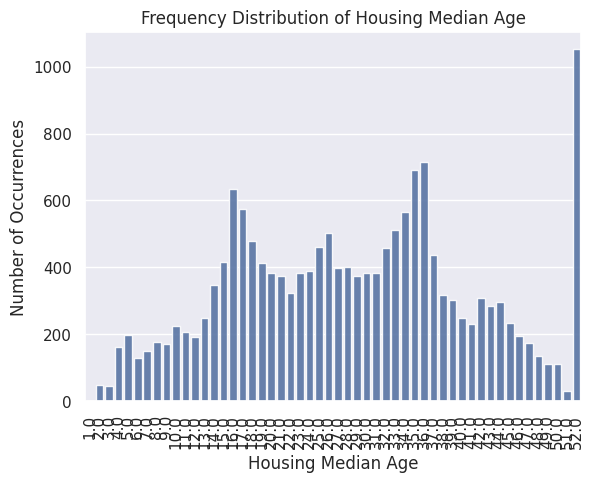

In [19]:
# Припустимо твій основний датафрейм називається `prices`
prices_objects = prices.copy()

# Перевірити ще раз:
print(prices_objects.columns)

# Тоді побудувати графік:
housing_median_age_count = prices_objects['housing_median_age'].value_counts()

import seaborn as sb
import matplotlib.pyplot as plt

sb.set(style="darkgrid")
sb.barplot(x=housing_median_age_count.index, y=housing_median_age_count.values, alpha=0.9)
plt.title('Frequency Distribution of Housing Median Age')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Housing Median Age', fontsize=12)
plt.xticks(rotation=90)
plt.show()



We have seen that the category <i>TA</i> is the top one. So we are going to supply the Nan values with this feature.

In [ ]:
prices_objects['BsmtQual'] = prices_objects['BsmtQual'].fillna(prices_objects['BsmtQual'].value_counts().index[0])

Now let's analyze the <i><b>BsmtCond</b></i> feature:

In [ ]:
BsmtCond_count = prices_objects['BsmtCond'].value_counts()
sb.set(style="darkgrid")
sb.barplot(BsmtCond_count.index, BsmtCond_count.values, alpha=0.9)
plt.title('Frequency Distribution of BsmtCond')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BsmtCond', fontsize=12)
plt.show()

We have seen that the category <i>TA</i> is the top one. So we are going to supply the Nan values with this feature.

In [20]:
prices_objects['total_bedrooms'] = prices_objects['total_bedrooms'].fillna(prices_objects['total_bedrooms'].mode()[0])


So now we will apply the same methodology with the rest of featues.

In [23]:
prices_objects['total_bedrooms'] = prices_objects['total_bedrooms'].fillna(prices_objects['total_bedrooms'].mode()[0])
prices_objects['total_rooms'] = prices_objects['total_rooms'].fillna(prices_objects['total_rooms'].mode()[0])
prices_objects['population'] = prices_objects['population'].fillna(prices_objects['population'].mode()[0])
prices_objects['households'] = prices_objects['households'].fillna(prices_objects['households'].mode()[0])
prices_objects['median_income'] = prices_objects['median_income'].fillna(prices_objects['median_income'].mode()[0])
prices_objects['housing_median_age'] = prices_objects['housing_median_age'].fillna(prices_objects['housing_median_age'].mode()[0])
prices_objects['latitude'] = prices_objects['latitude'].fillna(prices_objects['latitude'].mode()[0])
prices_objects['median_house_value'] = prices_objects['median_house_value'].fillna(prices_objects['median_house_value'].mode()[0])


Reviewing again the data frame, we will see that there is any null value.

In [24]:
prices_objects.isnull().sum()

,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


Now let's fix the <i>Nan</i> values from <b>prices</b> dataset. We will proceed with the same technique as with the <b>prices_objects</b>.

In [36]:
prices['total_bedrooms'] = prices['total_bedrooms'].fillna(prices['total_bedrooms'].mode()[0])
prices['total_rooms'] = prices['total_rooms'].fillna(prices['total_rooms'].mode()[0])
prices['population'] = prices['population'].fillna(prices['population'].mode()[0])
prices['households'] = prices['households'].fillna(prices['households'].mode()[0])




In [37]:
prices.isnull().sum()

,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


Now let's see how is the distribution of each category for some features. In the first case we will analyze the object variable <i>MSZoning</i>.

In [40]:
# To show the count of every category in MSZoning column
print(prices_objects['housing_median_age'].value_counts())


housing_median_age
52.0    1052
36.0     715
35.0     692
16.0     635
17.0     576
34.0     567
33.0     513
26.0     503
18.0     478
25.0     461
32.0     458
37.0     437
15.0     416
19.0     412
28.0     400
27.0     397
24.0     389
31.0     384
30.0     384
20.0     383
23.0     382
29.0     374
21.0     373
14.0     347
22.0     323
38.0     318
42.0     308
39.0     302
44.0     296
43.0     286
13.0     249
40.0     249
45.0     235
41.0     232
10.0     226
11.0     208
5.0      199
46.0     196
12.0     192
8.0      178
47.0     175
9.0      172
4.0      161
7.0      151
48.0     135
6.0      129
50.0     112
49.0     111
2.0       49
3.0       46
51.0      32
1.0        2
Name: count, dtype: int64


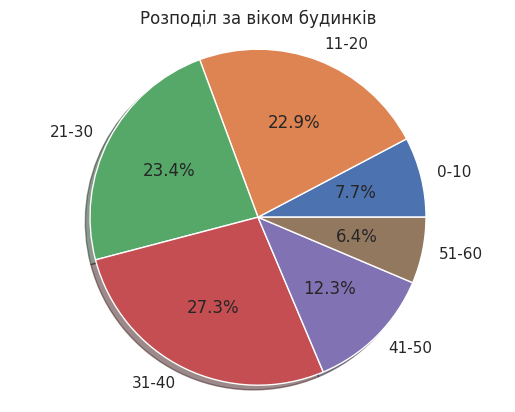

In [41]:
import matplotlib.pyplot as plt

# Припустимо, ми будуємо по 'housing_median_age'

# Створюємо категорії за десятиліттями
prices_objects['age_group'] = pd.cut(prices_objects['housing_median_age'],
                                     bins=[0, 10, 20, 30, 40, 50, 60],
                                     labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60'])

labels = prices_objects['age_group'].cat.categories.tolist()
counts = prices_objects['age_group'].value_counts().sort_index()
sizes = [counts[label] for label in labels]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')  # щоб круг був круглим
plt.title('Розподіл за віком будинків')
plt.show()


Now we will analyze the distribution of categories in the variable <i>Exterior2nd</i>.

In [43]:
# To show the count of every category in MSZoning column
# Порахувати кількість кожного віку будинків
print(prices_objects['housing_median_age'].value_counts())


housing_median_age
52.0    1052
36.0     715
35.0     692
16.0     635
17.0     576
34.0     567
33.0     513
26.0     503
18.0     478
25.0     461
32.0     458
37.0     437
15.0     416
19.0     412
28.0     400
27.0     397
24.0     389
31.0     384
30.0     384
20.0     383
23.0     382
29.0     374
21.0     373
14.0     347
22.0     323
38.0     318
42.0     308
39.0     302
44.0     296
43.0     286
13.0     249
40.0     249
45.0     235
41.0     232
10.0     226
11.0     208
5.0      199
46.0     196
12.0     192
8.0      178
47.0     175
9.0      172
4.0      161
7.0      151
48.0     135
6.0      129
50.0     112
49.0     111
2.0       49
3.0       46
51.0      32
1.0        2
Name: count, dtype: int64


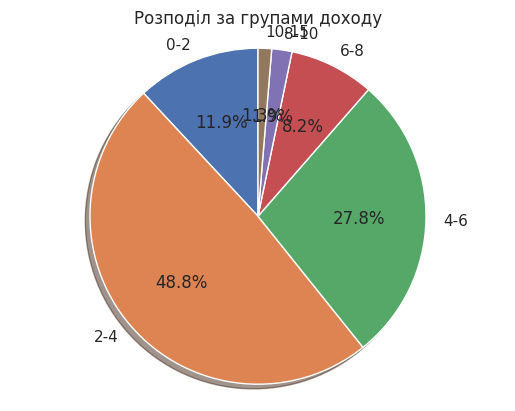

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Припустимо, у нас є датафрейм prices_objects

# Категоризуємо доходи
prices_objects['income_group'] = pd.cut(
    prices_objects['median_income'],
    bins=[0, 2, 4, 6, 8, 10, 15],
    labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10-15']
)

# Створення списків для pie chart
labels = prices_objects['income_group'].astype('category').cat.categories.tolist()
counts = prices_objects['income_group'].value_counts().sort_index()
sizes = [counts[var_cat] for var_cat in labels]

# Малюємо pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Розподіл за групами доходу')
plt.show()



## 3.2 Fixing the problem wiht categorical features

We will use Backward Difference Encoder technique.

In [46]:
encoder = ce.BackwardDifferenceEncoder(cols=[
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
    'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
    'SaleType', 'SaleCondition'
])


In [48]:
import pandas as pd
import category_encoders as ce

# Припустимо, твій датафрейм називається prices_objects
# Спочатку визначимо об'єктні або категоріальні колонки:
categorical_cols = prices_objects.select_dtypes(include=['object', 'category']).columns.tolist()

print('Категоріальні колонки:', categorical_cols)

# Створюємо енкодер тільки для існуючих категоріальних колонок
encoder = ce.BackwardDifferenceEncoder(cols=categorical_cols)

# Навчаємо та перетворюємо дані
prices_objects_BackDiffEnc = encoder.fit_transform(prices_objects)

# Виводимо перші 5 рядків
print(prices_objects_BackDiffEnc.head())


Категоріальні колонки: ['age_group', 'housing_median_age_group', 'income_group']
   latitude  housing_median_age  total_rooms  total_bedrooms  population  \
0     34.19                15.0       5612.0          1283.0      1015.0   
1     34.40                19.0       7650.0          1901.0      1129.0   
2     33.69                17.0        720.0           174.0       333.0   
3     33.64                14.0       1501.0           337.0       515.0   
4     33.57                20.0       1454.0           326.0       624.0   

   households  median_income  median_house_value  age_group_0  age_group_1  \
0       472.0         1.4936             66900.0     0.166667    -0.666667   
1       463.0         1.8200             80100.0     0.166667    -0.666667   
2       117.0         1.6509             85700.0     0.166667    -0.666667   
3       226.0         3.1917             73400.0     0.166667    -0.666667   
4       262.0         1.9250             65500.0     0.166667    -0.6666

## 3.3 Scaling data

In [54]:
# Автоматично знайти всі нечислові (категоріальні) колонки
categorical_cols = prices.select_dtypes(include=['object']).columns.tolist()

# Тепер можна їх безпечно видалити
prices_numeric = prices.drop(categorical_cols, axis=1)

# Об'єднати числові + закодовані категоріальні (якщо є)
prices_corpus = pd.concat([prices_numeric, prices_objects_BackDiffEnc], axis=1)

print(prices_corpus.shape)
print(prices_corpus.head())




(17000, 31)
   latitude  housing_median_age  total_rooms  total_bedrooms  population  \
0     34.19                15.0       5612.0          1283.0      1015.0   
1     34.40                19.0       7650.0          1901.0      1129.0   
2     33.69                17.0        720.0           174.0       333.0   
3     33.64                14.0       1501.0           337.0       515.0   
4     33.57                20.0       1454.0           326.0       624.0   

   households  median_income  latitude  housing_median_age  total_rooms  ...  \
0       472.0         1.4936     34.19                15.0       5612.0  ...   
1       463.0         1.8200     34.40                19.0       7650.0  ...   
2       117.0         1.6509     33.69                17.0        720.0  ...   
3       226.0         3.1917     33.64                14.0       1501.0  ...   
4       262.0         1.9250     33.57                20.0       1454.0  ...   

   housing_median_age_group_1  housing_median_age_

In [55]:
prices_corpus.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,latitude,housing_median_age,total_rooms,...,housing_median_age_group_1,housing_median_age_group_2,housing_median_age_group_3,housing_median_age_group_4,income_group_0,income_group_1,income_group_2,income_group_3,income_group_4,income_group_5
0,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,34.19,15.0,5612.0,...,-0.666667,-0.5,-0.333333,-0.166667,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857
1,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,34.40,19.0,7650.0,...,-0.666667,-0.5,-0.333333,-0.166667,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857
2,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,33.69,17.0,720.0,...,-0.666667,-0.5,-0.333333,-0.166667,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857
3,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,33.64,14.0,1501.0,...,-0.666667,-0.5,-0.333333,-0.166667,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857
4,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,33.57,20.0,1454.0,...,-0.666667,-0.5,-0.333333,-0.166667,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857


In [56]:
min_max_scaler = preprocessing.MinMaxScaler()

In [57]:
X = pd.DataFrame(min_max_scaler.fit_transform(prices_corpus), columns = prices_corpus.columns)
X.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,latitude,housing_median_age,total_rooms,...,housing_median_age_group_1,housing_median_age_group_2,housing_median_age_group_3,housing_median_age_group_4,income_group_0,income_group_1,income_group_2,income_group_3,income_group_4,income_group_5
0,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.175345,0.274510,0.147885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.197662,0.352941,0.201608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.122210,0.313725,0.018927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.116897,0.254902,0.039515,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.109458,0.372549,0.038276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparing test set

In [61]:
import pandas as pd

# Завантаження California Housing Test
prices_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

# В цьому датасеті немає об'єктних колонок (все числове), тому цей крок зайвий
# Але якщо хочеш перевірити:
prices_objects_test = prices_test.select_dtypes(include=['object']).copy()

# Забираємо об'єктні дані, залишаємо лише числові
prices_test = prices_test.select_dtypes(exclude=['object']).copy()

# Тут немає колонки 'Id', тому пропускаємо або:
# prices_test = prices_test.drop(['Id'], axis=1, errors='ignore')

# Перевірка пропущених значень
print(prices_test.isnull().sum())

# Якщо знайдуться пропуски (насправді у California Housing їх майже немає),
# заповнити їх можна наприклад так:
prices_test = prices_test.fillna(prices_test.median())

# Перевіримо ще раз
print(prices_test.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [63]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Завантаження
prices_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Тільки числові колонки
prices_test = prices_test.select_dtypes(exclude=['object']).copy()

# Якщо треба обробити пропущені значення
prices_test = prices_test.fillna(prices_test.median())

# Масштабування
min_max_scaler = MinMaxScaler()
Xtest = pd.DataFrame(min_max_scaler.fit_transform(prices_test), columns=prices_test.columns)


## 4. Dimensionality Reduction

In [64]:
pca = PCA()
pca.fit(X)

PCA()

Text(0, 0.5, 'Variance Ratio')

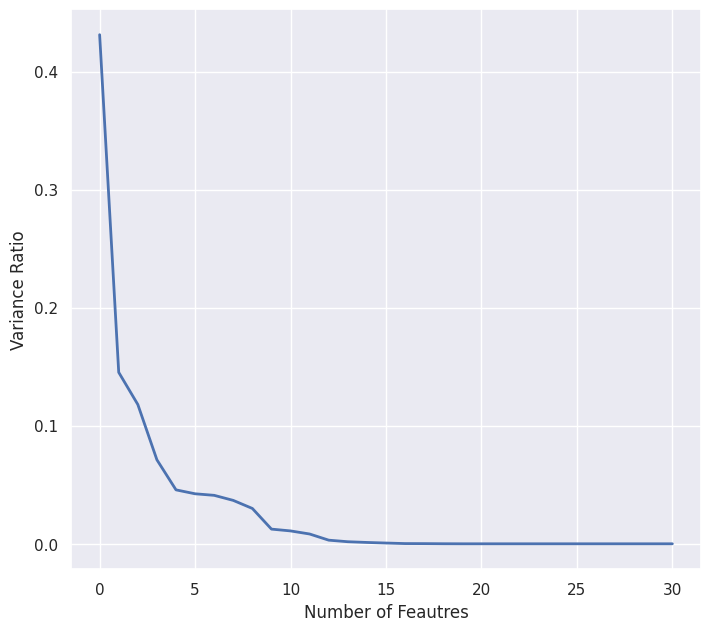

In [65]:
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Feautres')
plt.ylabel('Variance Ratio')

In [66]:
pca = PCA(n_components=10)

In [67]:
pca.fit(X)

PCA(n_components=10)

In [78]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# 1. Завантаження даних
prices_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

# 2. Твій датасет вже містить лише числові дані — об'єктних колонок немає
# Тому нічого дропати або філити не треба.

# 3. Масштабуємо дані
scaler = MinMaxScaler()
Xtest = pd.DataFrame(scaler.fit_transform(prices_test), columns=prices_test.columns)

# 4. Якщо у тебе є тренувальні дані X, то також скейлимо їх
# (Тут X має бути вже підготовлений аналогічно)
# Наприклад:
# X = pd.DataFrame(scaler.fit_transform(prices_train), columns=prices_train.columns)

# 5. Навчаємо PCA на тренувальних даних
pca = PCA(n_components=9)  # Або менше, якщо потрібно
pca.fit(X)                 # X — це тренувальні дані

# 6. Трансформуємо тренувальні та тестові дані
Xtrain_pca = pca.transform(X)




In [80]:
Xtest_pca = pca.transform(X)

In [81]:
Ytrain = Ytrain.astype(float)

## 5. Support Vector Machine for Regression

In [82]:
clf = SVR(C=0.8, epsilon=0.2, kernel='poly')
#regr = RandomForestRegressor(max_depth=3)

In [83]:
clf.fit(Xtrain_pca, Ytrain)
#regr.fit(Xtrain_pca, Ytrain)

SVR(C=0.8, epsilon=0.2, kernel='poly')

In [84]:
Ypredict = clf.predict(Xtest_pca)
#Ypredict = regr.predict(Xtest_pca)

In [88]:
test = pd.read_csv('/content/sample_data/california_housing_test.csv')
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [90]:
Ypred = pd.DataFrame({'median_house_value': Ypredict})
prediction = pd.concat([test.reset_index(drop=True), Ypred], axis=1)


In [93]:
prediction.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,178748.041496
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,178871.445317
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,178879.165083
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,179437.704992
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,178933.363578


In [94]:
prediction.to_csv('predictions.csv', sep=',', index=False)